### Define orthogonal matrix in the exponential form: 
$$R^{ij}=\exp\Big[\frac{1}{2} \sum\limits_{m,n}\theta_{m,n} J_{m,n}^{i,j} \Big]$$
with: 
$$J_{m,n}^{ij}=  \delta_{mi}\delta_{nj}-\delta_{mj} \delta_{ni}, \, \theta_{m,n} =-\theta_{n,m} $$



*There seems to be no way to do the exponential analytically for arbitrary dimension*

###### In general, you can just use 
$$ R^{ij}= e^{J^{i,j}} $$

with $J^{i,j}=-J^{j,i}$

In [1]:
import sympy as sp
import numpy as np

In [2]:
sp.init_printing()

In [3]:
def KronD(i,j):
    if i==j:
        return 1
    else:
        return 0

In [4]:
dim=3
theta=sp.IndexedBase('theta', shape=(dim,dim))
(m,n,i,j)=sp.symbols('m n j i', cls=sp.Idx)

theta=sp.Matrix(dim,dim, lambda i,j : theta[i+1,j+1] if i<j else 0 if i==j else -theta[j+1,i+1])

In [ ]:
tmpJ=[]
for m in range(1,1+dim):
    for n in range(1,1+dim):
        for i in range(1,1+dim):
            for j in range(1,1+dim):
                #tmpJ.append(J[m,n,i,j])
                tmpJ.append(KronD(m,i)*KronD(n,j)-KronD(m,j)*KronD(n,i) )
                
                
J=sp.Array(tmpJ,shape=(dim,dim,dim,dim))                

In [ ]:
m,n=sp.symbols('m n ')

#ExpSum=sp.Matrix(dim,dim, lambda i,j: sp.Sum( sp.Symbol('theta'+str([m,n])) *sp.Symbol('J'+str([m,n,i,j])),(m, 0,dim-1),(n, 0,dim-1)))
ExpSum=sp.Matrix(dim,dim, lambda i,j: sp.summation(theta[m,n]/2*J[m,n,i,j],(m, 0,dim-1),(n, 0,dim-1)))


R=sp.exp(sp.Matrix(dim,dim, lambda i,j: sp.summation(theta[m,n]/2*J[m,n,i,j],(m, 0,dim-1),(n, 0,dim-1))))

In [ ]:
sp.simplify(R.rewrite(sp.sin))

In [ ]:
sp.simplify(np.dot(np.array(sp.transpose(R.rewrite(sp.cos))),np.array(R.rewrite(sp.cos))))

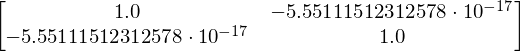

In [108]:
#Check numerically

dim=2
(m,n,i,j)=sp.symbols('m n j i', cls=sp.Idx)

theta=[[ np.random.rand() if i<j else 0   for j in range(dim)] for i in range(dim)]
theta=[[ theta[i][j] if i<j else -theta[j][i]    for j in range(dim)] for i in range(dim)]

tmpJ=[]
for m in range(1,1+dim):
    for n in range(1,1+dim):
        for i in range(1,1+dim):
            for j in range(1,1+dim):
                tmpJ.append(KronD(m,i)*KronD(n,j)-KronD(m,j)*KronD(n,i) )
                
                
J=np.reshape(tmpJ,(dim,dim,dim,dim)) 


ExpSum=[]
for i in range(dim):
    for j in range(dim):
        stmp=0
        for m in range(dim):
            for n in range(dim):     
                stmp+=theta[m][n]*J[m,n,i,j]/2.
        ExpSum.append(stmp)
ExpSum=np.reshape(ExpSum,(dim,dim))




import scipy as scp
R=scp.linalg.expm(ExpSum)

Test=np.dot(R,np.transpose(R))

sp.Matrix(dim,dim , lambda i,j:Test[i][j] )